# Árboles de clasificación

En la presente tarea se busca practicar cómo el modelo de árbol de decisión es aplicado para un problema de clasificación.
Se sugiere analizar y entender cada una de las tareas que se desarrollan en cada etapa (Análisis exploratorio, entrenamiento del modelo).

Coloque un comentario en cada sentencia, explicando la tarea o resultado que se obtiene.

Recuerde que la presente tarea debe ser presentada junto al laboratorio 07, puesto que comprende el 25% de la nota.


In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Análisis exploratorio

Titanic dataset: https://www.kaggle.com/c/titanic

**Goal:**

Su trabajo consiste en predecir si un pasajero sobrevivió o no al naufragio del Titanic.
Para cada PassengerID del conjunto de prueba, Ud. debe predecir un valor de 0 ó 1 para la variable Survived.

Data description:

<table><tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody></table>

In [59]:
df = pd.read_csv('titanic.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [60]:
# Tamaño del dataset:  (filas, columnas)
# En la nomenclatura de pandas: (axis 0, axis 1)
df.shape

(891, 12)

In [61]:
# Veamos los tipos de variables
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [62]:
# La cantidad de registros únicos por variable
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [63]:
# % de registros únicos por variable
df.nunique() / len(df)

PassengerId    1.000000
Survived       0.002245
Pclass         0.003367
Name           1.000000
Sex            0.002245
Age            0.098765
SibSp          0.007856
Parch          0.007856
Ticket         0.764310
Fare           0.278339
Cabin          0.164983
Embarked       0.003367
dtype: float64

In [64]:
# % de datos faltantes
df.isna().sum() / len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [65]:
# Antes de continuar podemos eliminar algunas variables del dataset que filtran informacion acerca de nuestro objetivo.
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
# axis=1: aplicamos la función a las columnas
# inplace=True: aplica la función al dataframe
# inplace=False (default): devuelve el dataframe modificado

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Variables categóricas y variables numéricas

In [66]:
# Veamos las columnas, este tipo de sintaxis se llama "list comprehensions"
[c for c in df]
#list(df.columns)

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

[list comprehensions documentation](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)

In [67]:
# Una variable númerica puede tener distintos tipos (int, float, double, ...).
# Para ver si una variables es numérica podemos usar la función pd.api.types.is_numeric_dtype:
pd.api.types.is_numeric_dtype(df['Age'])

True

In [68]:
# Variables numéricas
num_vars = [c for c in df if pd.api.types.is_numeric_dtype(df[c])]
num_vars

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [69]:
# Variables categóricas
cat_vars = [c for c in df if not pd.api.types.is_numeric_dtype(df[c])]
cat_vars

['Sex', 'Cabin', 'Embarked']

### Transformar las variables  a categoricas

In [70]:
# Si usamos get_dummies, se generan muchas columnas
pd.get_dummies(df)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,3,NaN,0,0,8.4583,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,3,2.0,3,1,21.0750,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1,3,27.0,0,2,11.1333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,2,14.0,1,0,30.0708,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [72]:
df[cat_vars].nunique()

Sex           2
Cabin       147
Embarked      3
dtype: int64

La variable "Cabin" tiene muchos valores únicos.

Vamos a aplicar otro método para transformar los valores a numéricos: **label encoding**.

In [73]:
# Usando el metodo "astype" Podemos cambiar el tipo de variable a "category":
t = df['Sex'].astype('category')
t.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: category
Categories (2, object): [female, male]

In [74]:
# Cuando una columna se convierte a tipo category, los datos faltantes se completan con -1.
# Es una buena práctica sumar +1 al índice de manera que los datos faltantes usen el indice 0.
t_dict = {i+1:e for i,e in enumerate(t.cat.categories)}
t_dict

{1: 'female', 2: 'male'}

In [75]:
# Ahora vamos a aplicar esta transformación a todas las variables categóricas,
# guardando un diccionario de códigos.

# 1. Creamos un diccionario vacio
cat_dict = {}

for cat in cat_vars:
    # 2. Transformamos la variable a tipo category
    df[cat] = df[cat].astype('category')
    
    # 3. Agregamos el diccionario de códigos
    cat_dict[cat] = {i+1:e for i,e in enumerate(df[cat].cat.categories)}


In [76]:
cat_dict['Sex']

{1: 'female', 2: 'male'}

In [77]:
df.dtypes

Survived       int64
Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin       category
Embarked    category
dtype: object

In [78]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Data faltante

In [82]:
df[num_vars].isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

Al transformar la data categórica, se asignó un código para los datos faltantes.

En el caso de data numérica debemos hacer un tratamiento especial a la data faltante.

El procedimiento que realizaremos es el siguiente:
1. Obtenemos un diccionario con las medianas de cada variable.
2. Creamos una columna que indique si hay data faltante.
3. Reemplazamos los datos faltantes con la mediana obtenida.

In [83]:
# 1. Obtenemos la mediana de la columna y la almacenamos en un diccionario.
na_dict = df[num_vars].median().to_dict()
na_dict

{'Survived': 0.0,
 'Pclass': 3.0,
 'Age': 28.0,
 'SibSp': 0.0,
 'Parch': 0.0,
 'Fare': 14.4542}

In [84]:
# 2. Creamos una columna que indique si hay data faltante.
df['Age_na'] = df['Age'].isna()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_na
0,0,3,male,22.0,1,0,7.2500,NaN,S,False
1,1,1,female,38.0,1,0,71.2833,C85,C,False
2,1,3,female,26.0,0,0,7.9250,NaN,S,False
3,1,1,female,35.0,1,0,53.1000,C123,S,False
4,0,3,male,35.0,0,0,8.0500,NaN,S,False


In [85]:
# 3. Reemplazamos los datos faltantes con la mediana obtenida.
df.Age.fillna(na_dict['Age'], inplace=True)
df[num_vars].isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

### Guardamos la data preprocesada

In [86]:
import pickle
# El formato pickle nos permite guardar objetos de python
with open('titanic_cat_dict.pkl', 'wb') as f:
    pickle.dump(cat_dict, f)
    
with open('titanic_na_dict.pkl', 'wb') as f:
    pickle.dump(na_dict, f)

df.to_pickle('titanic_train.pkl')

In [87]:
# Cargar data
with open('titanic_cat_dict.pkl', 'rb') as f:
    cat_dict = pickle.load(f)

with open('titanic_na_dict.pkl', 'rb') as f:
    na_dict = pickle.load(f)

df_raw = pd.read_pickle('titanic_train.pkl')

df_raw.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_na
0,0,3,male,22.0,1,0,7.2500,NaN,S,False
1,1,1,female,38.0,1,0,71.2833,C85,C,False
2,1,3,female,26.0,0,0,7.9250,NaN,S,False
3,1,1,female,35.0,1,0,53.1000,C123,S,False
4,0,3,male,35.0,0,0,8.0500,NaN,S,False


### Convertimos las columnas a numéricas

In [88]:
# Hacemos una copia de la data
df = df_raw.copy()

# Convertimos cada columna categórica a numérica
for n,col in df.items():
    # n: nombre de la columna
    # col: data de la columna
    if pd.api.types.is_categorical_dtype(col):
        df[n] = col.cat.codes+1
        
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_na
0,0,3,2,22.0,1,0,7.2500,0,3,False
1,1,1,1,38.0,1,0,71.2833,82,1,False
2,1,3,1,26.0,0,0,7.9250,0,3,False
3,1,1,1,35.0,1,0,53.1000,56,3,False
4,0,3,2,35.0,0,0,8.0500,0,3,False


# Entrenar modelo

In [89]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [90]:
# Entrenamos un arbol con poca profundidad, para visualizarlo comodamente:
from sklearn.tree import DecisionTreeClassifier
m = DecisionTreeClassifier(max_depth=3)
m.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
m.score(x, y)

0.8237934904601572

# ¿Cómo saber si el modelo esta haciendo un buen trabajo?

Vamos a separar la data en 2 conjuntos: uno para entrenar el modelo (**train set**) y otro para validar el modelo (**validation set**).

In [92]:
from sklearn.model_selection import train_test_split

# Usamos método "train_test_split" para usar el 20% de la data para validar el modelo.
# El parámetro "random state" nos sirve para poder replicar la misma separación.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape: {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape: (712, 9)
Validation shape: (179, 9)


# Preguntas para desarrollar

### a. (0.5 puntos) Entrenar un árbol de decisión con la data de entrenamiento.

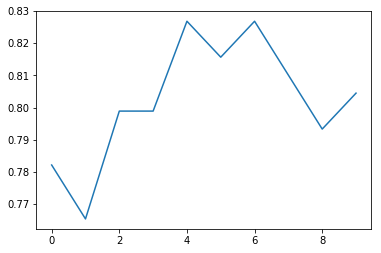

In [108]:
scores=[]
for i in range(1,11):
    dtc=DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_train,y_train)
    scores.append(dtc.score(x_val,y_val))

plt.plot(scores)
plt.show()

In [141]:
##Desarrolle su código
dtc= DecisionTreeClassifier(max_depth=6)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### b. (0.5 puntos) Evaluar el resultado con la data de entrenamiento.

In [123]:
## Desarrolle su código
dtc.score(x_train,y_train)


0.8764044943820225

### c. (0.5 puntos) Evaluar el resultado con la data de validación.

In [124]:
## Desarroller su código
dtc.score(x_val,y_val)


0.8156424581005587

### d. (1.0 puntos) Ver la documentacion del metodo DecisionTreeClassifier, experimenta con distintos parámetros y observa los resultados.
  - ¿Qué parámetros te ayudan a incrementar la precisión?
  
  La profundidad del árbol.
  
  - ¿Cómo cambia la precisión en el conjunto de prueba?
  
  La precisión en el conjunto de prueba disminuye porque los elementos no participaron en el entrenamiento.

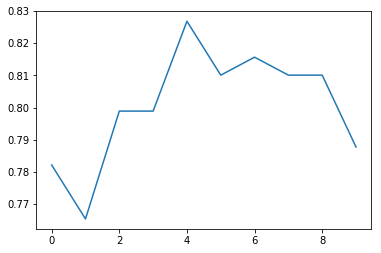

In [140]:
scores=[]

for i in range(1,11):
    dtc_2=DecisionTreeClassifier(max_depth=i)
    dtc_2.fit(x_train,y_train)
    scores.append(dtc_2.score(x_val,y_val))

plt.plot(scores)
plt.show()

In [136]:
## Desarrolle su código
dtc2=DecisionTreeClassifier(max_depth=5)
dtc2.fit(x_train,y_train)
dtc2.score(x_val,y_val)


0.8268156424581006

### e. (2.5 puntos) Aplique Random Forest entrenándolo con el conjunto Train. Muestre los resultados y compárelos con la versión de árbol simple mostrando los scores con: Train, Validation. Otorgue una explicación de la optimización de parámetros que realizó para obtener su mejor resultado.

In [160]:
## Desarrolle su código
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(n_estimators=7, n_jobs=-1)
rfc.fit(x_train,y_train)
rfc.score(x_val,y_val)


0.8212290502793296

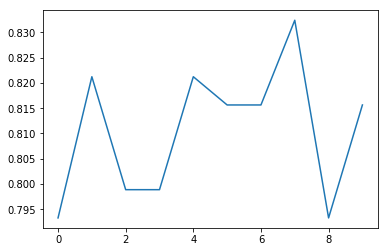

In [131]:
scores=[]

for i in range(1,11):
    rfc1=RandomForestClassifier(n_estimators=i,n_jobs=-1)
    dtc.fit(x_train,y_train)
    scores.append(dtc.score(x_val,y_val))

plt.plot(scores)
plt.show()

In [163]:
#Me base en la gráfica para otorgar los parametros